### 利用matplotlib开源库实现GIS数据统计分析


In [3]:
import matplotlib.pyplot as plt
from osgeo import ogr


In [4]:
path_kunming_vec = 'data/Section-4/kunming_districts_utm.shp'


In [7]:
ds = ogr.Open(path_kunming_vec, 0)  ## 0是只读，1是可写
layer = ds.GetLayer(0); 
area_dict = {}
perimeter_dict = {}
for i in range(layer.GetFeatureCount()):
    fea = layer.GetFeature(i)   ## 索引为1开头
    fea_name = fea.GetField('dt_name')
    fea_area = fea.geometry().Area()/1000000
    area_dict[fea_name] = fea_area
    print('Region:', fea_name, ' ', end='')
    print('Area is: ', fea_area)


Region: wuhua  Area is:  377.9959786954036
Region: panlong  Area is:  864.2952967369314
Region: guandu  Area is:  638.33361729476
Region: xishan  Area is:  897.3967316211449
Region: dongchuan  Area is:  1866.1175875335907
Region: chenggong  Area is:  499.3639638876685
Region: jinning  Area is:  1338.5644973111487
Region: fuming  Area is:  994.6751193008305
Region: yiliang  Area is:  1914.0921754168523
Region: shilin  Area is:  1681.3428560105956
Region: sonming  Area is:  828.4756858595108
Region: luquan  Area is:  4227.345074248596
Region: xundian  Area is:  3598.342900037223
Region: anning  Area is:  1301.0062596518314


#### 线图可视化分析

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


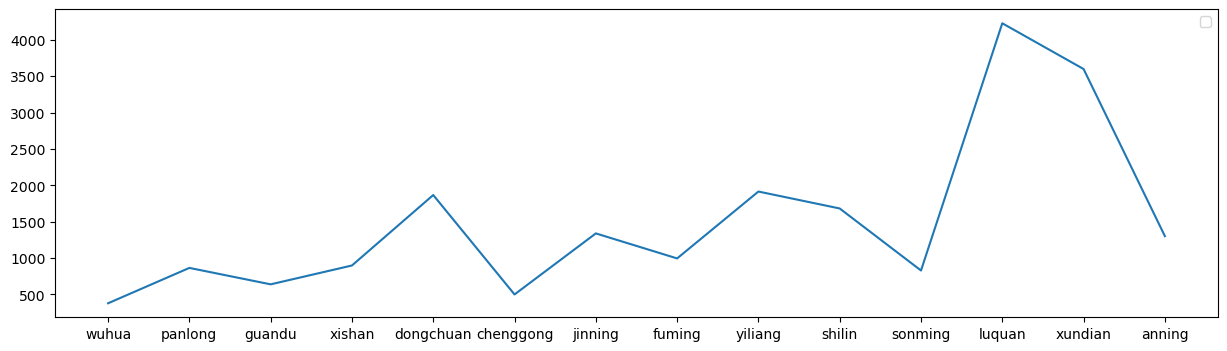

In [12]:
plt.figure(figsize=(15,4))
plt.plot(area_dict.keys(), area_dict.values())
# plt.plot(area_dict.keys(), area_dict.values(), '-ro', linewidth=3, markersize=10, label='area') 
plt.legend()


#### 散点图分析

(-1.0, 1.0)

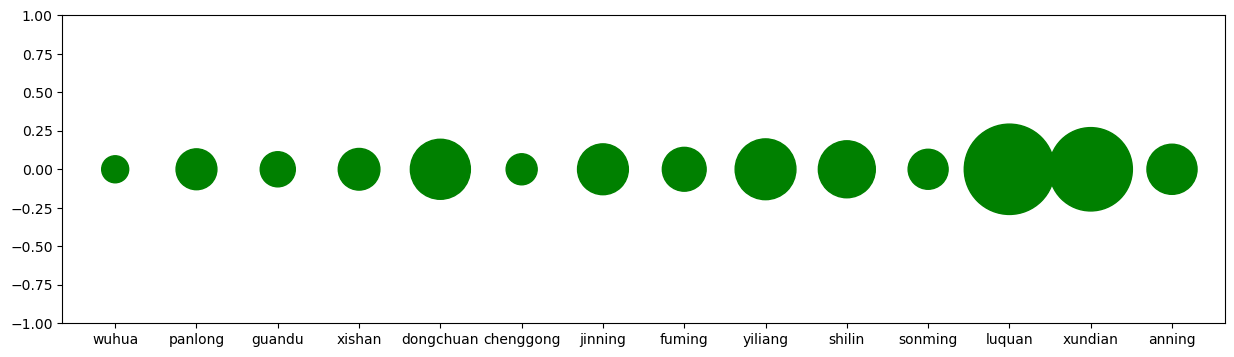

In [23]:
plt.figure(figsize=(15,4))
y = [0 for i in range(area_dict.__len__())]
plt.scatter(area_dict.keys(), y, s=list(area_dict.values()), color='g')
plt.ylim(-1, 1)


#### 柱状图

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


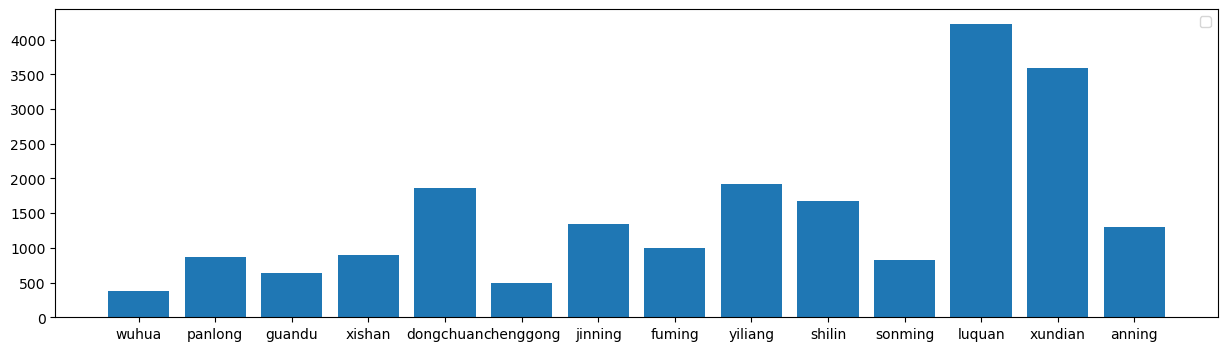

In [24]:
plt.figure(figsize=(15,4))
plt.bar(area_dict.keys(), area_dict.values())
# plt.bar(area_dict.keys(), area_dict.values(), width=0.5, fc='g', ec='r', label='area')
plt.legend()
